In [18]:
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
import matplotlib.pyplot as plt
import matplotlib
plt.style.use(['ggplot', 'dark_background'])
plt.rcParams['axes.grid'] = False

plt.style.use('default')

from importlib import reload
from latila_lib import plot as _plot
lplt = reload(_plot)

lplt.change_font('STKaiti')

In [35]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [11]:
import arviz as az
# ArviZ ships with style sheets!
az.style.use("arviz-darkgrid")
import xarray
xarray.set_options(display_style="html")

In [12]:
size = 100
dataset = az.convert_to_inference_data(np.random.randn(size))
dataset

Inference data with groups:
	> posterior

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d9d2be390>],
      dtype=object)

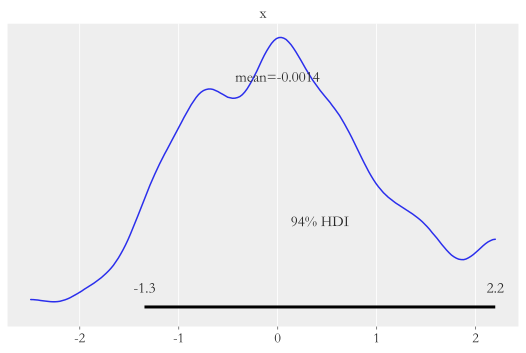

In [8]:
az.plot_posterior(np.random.randn(100))

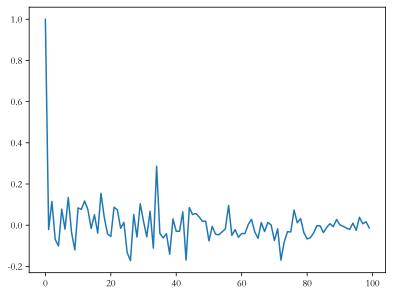

In [19]:
plt.plot(az.autocorr(np.random.randn(100)))

In [36]:
a = az.convert_to_inference_data(np.random.randn(100))
b = az.convert_to_inference_data(np.random.uniform(size=100))
az.plot_dist(np.random.randn(100), quantiles=[0.5], backend="bokeh")

Figure(id='1214', ...)